In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi
import random

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly

In [13]:
parameters = [10.0, 28.0, 8.0/3.0]#sigma, rho, beta

In [14]:
parameters1 = [5.0, 18.0, 8.0]

In [15]:
# Lorenz model

def Lorenz(state,t):
    x, y, z = state  # Unpack the state vector
    return parameters[0] * (y - x), x * (parameters[1] - z) - y, x * y - parameters[2] * z  # Derivatives

state0 = [1.0, 1.0, 1.0] # initial condition
t = np.arange(0.0, 100.0, 0.02) # time vector

states = odeint(Lorenz, state0, t) # vector containing the (x,y,z) positions for each time step

In [16]:
# Lorenz model

def Lorenz1(state,t):
    x, y, z = state  # Unpack the state vector
    return parameters1[0] * (y - x), x * (parameters1[1] - z) - y, x * y - parameters1[2] * z  # Derivatives

states1 = odeint(Lorenz1, state0, t) # vector containing the (x,y,z) positions for each time step

In [17]:
squares = np.int_(np.floor(states / 5))

matrix = np.zeros((8, 12, 10))
for elem in squares:
    square = tuple(elem)
    x, y, z = square
    matrix[x + 4][y + 6][z] += 1

In [18]:
squares1 = np.int_(np.floor(states1 / 5))

matrix1 = np.zeros((8, 12, 10))
for elem in squares1:
    square1 = tuple(elem)
    x, y, z = square1
    matrix1[x + 4][y + 6][z] += 1

In [ ]:
xy = np.sum(matrix, axis=2)
yz = np.sum(matrix, axis=0)
xz = np.sum(matrix, axis=1)

x, y, z = np.linspace(-20, 20, 9), np.linspace(-30, 30, 13), np.linspace(0, 50, 11)

plt.pcolormesh(x, y, xy.T)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

plt.pcolormesh(x, z, xz.T)
plt.xlabel("x")
plt.ylabel("z")
plt.colorbar()
plt.show()

plt.pcolormesh(y, z, yz.T)
plt.xlabel("y")
plt.ylabel("z")
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True system'])
plt.draw()
plt.show()

C:\Users\quent\AppData\Local\Temp/ipykernel_17196/2857161259.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


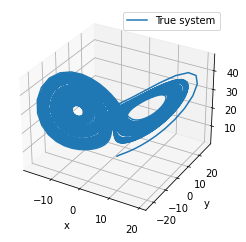

In [5]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True system'])
plt.draw()
plt.show()

In [8]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"


fig = go.Figure(data=[go.Scatter3d(x=states[:, 0],y=states[:, 1],z=states[:, 2],
                                   mode='markers',
                                   marker=dict(
                                       size=2,
                                       opacity=0.8
    )                        
                                   )])
fig.update_layout(
    title='True system')
fig.update_scenes(aspectmode='data')
fig.show()

In [10]:
print(matrix[1][1][1])

0.0


In [28]:
def L1(X, Y):
    distance = abs(X-Y)
    return np.sum(distance)

In [30]:
def Linf(X, Y):
    distance = abs(X - Y)
    return np.max(distance)

In [29]:
print(L1(matrix, matrix1))

9950.0


In [31]:
print(Linf(matrix, matrix1))

4951.0
